In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import env
import wrangle_zillow
from zillow_query import query as zquery
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [3]:
# get my mall 
df = wrangle_zillow.acquire_zillow()
df.shape

(52319, 68)

In [4]:
df.describe()

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,logerror,buildingclassdesc
count,5.231900e+04,5.231900e+04,13615.000000,70.00000,47.000000,52319.000000,52319.000000,0.0,33654.000000,52184.000000,...,81.0,5.223700e+04,5.231800e+04,52319.0,5.231800e+04,52315.000000,2068.000000,5.219800e+04,52319.000000,0.0
mean,1.496888e+06,1.299682e+07,2.439589,7.10000,678.978723,2.300015,3.300770,NaN,6.264961,2.305276,...,1.0,1.966385e+05,5.298287e+05,2016.0,3.334946e+05,6454.802564,14.101064,6.050245e+13,0.018136,NaN
std,8.594310e+05,3.350951e+06,3.847925,2.66567,711.825226,1.022816,0.947563,NaN,1.716328,1.018076,...,0.0,2.542880e+05,7.518358e+05,0.0,5.705157e+05,8752.550365,2.400399,1.861145e+12,0.176904,NaN
min,3.490000e+02,1.071186e+07,1.000000,2.00000,38.000000,0.000000,0.000000,NaN,1.000000,1.000000,...,1.0,1.290000e+02,1.000000e+03,2016.0,1.610000e+02,49.180000,4.000000,6.037101e+13,-4.655420,NaN
25%,7.575810e+05,1.151017e+07,1.000000,7.00000,263.500000,2.000000,3.000000,NaN,5.000000,2.000000,...,1.0,7.715900e+04,1.940205e+05,2016.0,7.619400e+04,2660.965000,14.000000,6.037401e+13,-0.024702,NaN
50%,1.500095e+06,1.257825e+07,1.000000,7.00000,512.000000,2.000000,3.000000,NaN,6.000000,2.000000,...,1.0,1.319100e+05,3.740080e+05,2016.0,2.180790e+05,4650.620000,15.000000,6.037620e+13,0.006935,NaN
75%,2.241248e+06,1.413036e+07,1.000000,7.00000,809.500000,3.000000,4.000000,NaN,8.000000,3.000000,...,1.0,2.264550e+05,6.193580e+05,2016.0,4.087795e+05,7379.320000,15.000000,6.059042e+13,0.040599,NaN
max,2.982270e+06,1.676878e+08,13.000000,21.00000,3560.000000,18.000000,14.000000,NaN,12.000000,18.000000,...,1.0,9.164901e+06,4.906124e+07,2016.0,4.895220e+07,586639.300000,99.000000,4.830301e+14,5.262999,NaN


In [9]:
train, val_test = train_test_split(df, train_size = 0.7,
                                  random_state = 42,
                                  stratify = None)
val, test = train_test_split(val_test, train_size =0.5,
                            random_state = 42,
                            stratify = None)

### Hypothesis questions

1. Are there significant differences in Logerror Among taxamount?

2. How Does Logerror Correlate with property age?

3. Is there a Seasonal Trend in Logerror?

4. What is the relationshiph between logerror and bedroomcnt

5. Does logerror vary with yearbuilt?

In [ ]:
## Does logerror differ across taxamount?

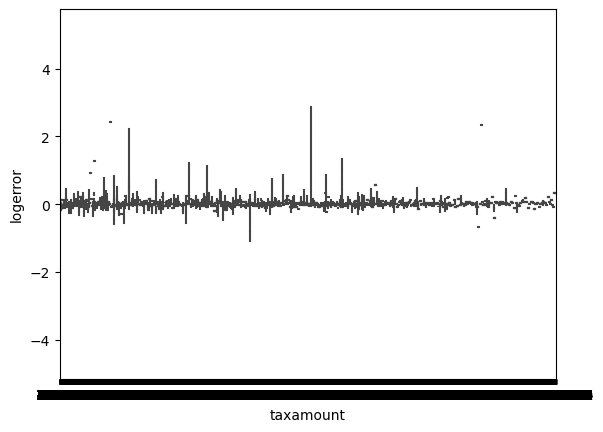

In [11]:
sns.boxplot(data = train, x='taxamount', y='logerror')
plt.show()

In [ ]:
# verify assumptions: normal distribution
for fips_code in train.taxamount.unique():
    county = train[train.taxamount]
    sns.histplot(county.logerror)
    plt.show()

In [ ]:
df.duplicated()

In [ ]:
df.value_counts()

In [ ]:
wrangle_zillow.missing_by_col(df)

In [ ]:
col=df.columns
wrangle_zillow.get_fences(df, col)

In [ ]:
wrangle_zillow.report_outliers(df, k=1.5)

In [ ]:
train, val_test = train_test_split(df, train_size = 0.7,
                                  random_state = 42,
                                  stratify = None)
val, test = train_test_split(val_test, train_size =0.5,
                            random_state = 42,
                            stratify = None)

In [ ]:
train.shape

In [ ]:
print("train observations: ", train.size)
print("validate observations: ", val.size)
print("test observations: ", test.size)


Questions I will ask: 

